# MACHINE LEARNING - ANALISIS NO SUPERVISADO

Realizado por: Hugo Cordoba Leal

In [44]:
#Importamos las librerias necesarias para resolver el caso

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score


rn_state = 42 # random state for reproducibility

**Caso 1. Clústeres de enfermedades cardiovasculares**

In [45]:
# Leemos el dataset de enfermedades cardiovasculares

df_estres = pd.read_csv('./Sleep_health_and_lifestyle_dataset.csv')
df_estres.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


**Identificadores y variables intrabajables**

Vemos qué variables no nos aportan información o no podemos usarlas. En este
caso elimino Person ID, porque no me aporta información de interes.

In [46]:
df_estres.drop(['Person ID'], axis=1, inplace=True)

**Variables categoricas**

Vemos qué variables no nos aportan información o no podemos usarlas. En este
caso elimino Person ID, porque no me aporta información de interes.

In [51]:
df_estres['Gender'] = label_encoder.fit_transform(df_estres['Gender'])
df_estres['Occupation'] = label_encoder.fit_transform(df_estres['Occupation'])
df_estres['BMI Category'] = label_encoder.fit_transform(df_estres['BMI Category'])
df_estres['Sleep Disorder'] = label_encoder.fit_transform(df_estres['Sleep Disorder'])
df_estres.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,27,9,6.1,6,42,6,3,126/83,77,4200,2
1,1,28,1,6.2,6,60,8,0,125/80,75,10000,2
2,1,28,1,6.2,6,60,8,0,125/80,75,10000,2
3,1,28,6,5.9,4,30,8,2,140/90,85,3000,1
4,1,28,6,5.9,4,30,8,2,140/90,85,3000,1


**Normalizamos los datos**

In [53]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_estres)
df_estres.head()

ValueError: could not convert string to float: '126/83'

**Clustering**

Para ello, he elegido clusterizar los datos entrenando el modelo K-Means 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df_cardio.copy()
cat_columns = df_cardio.select_dtypes(['category']).columns

X[cat_columns] = X[cat_columns].apply(lambda x: x.cat.codes)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print('number of components:', pca.n_components_)
print('explained variance ratio:', pca.explained_variance_ratio_)
print('sum of explained variance ratio:', sum(pca.explained_variance_ratio_))

number of components: 13
explained variance ratio: [0.2591908  0.1085649  0.08280249 0.08222581 0.07322391 0.07119302
 0.0615255  0.0593184  0.05597801 0.05235434 0.04872193 0.03228202
 0.01261889]
sum of explained variance ratio: 1.0


In [ ]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

X_pca.shape

(1000, 11)

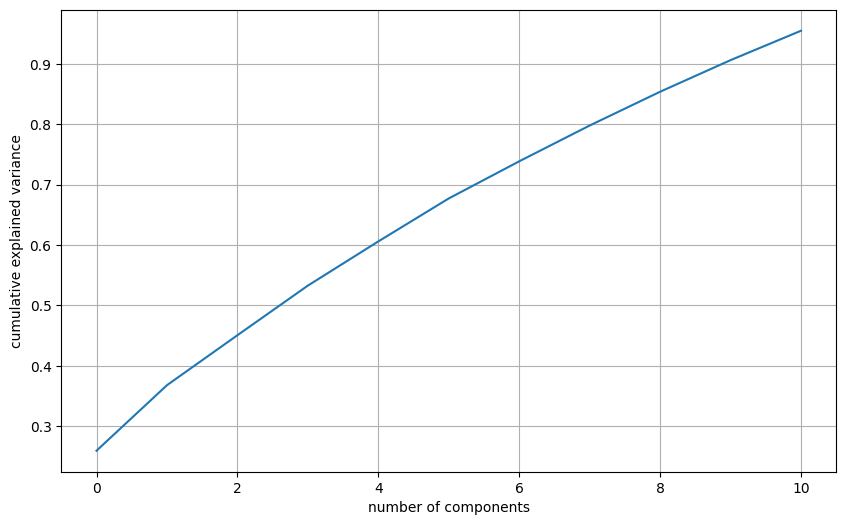

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

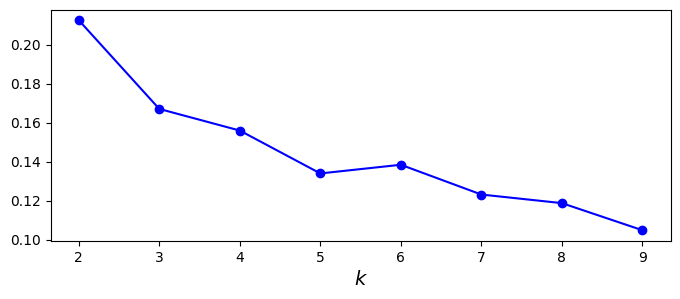

In [ ]:
max_k = 10
kmeans_per_k = [KMeans(n_clusters=k, random_state=rn_state).fit(X_pca) for k in range(1, max_k)]
silhouette_scores = [silhouette_score(X_pca, model.labels_) for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, max_k), silhouette_scores, "bo-")

plt.xlabel("$k$", fontsize=14)

plt.show()

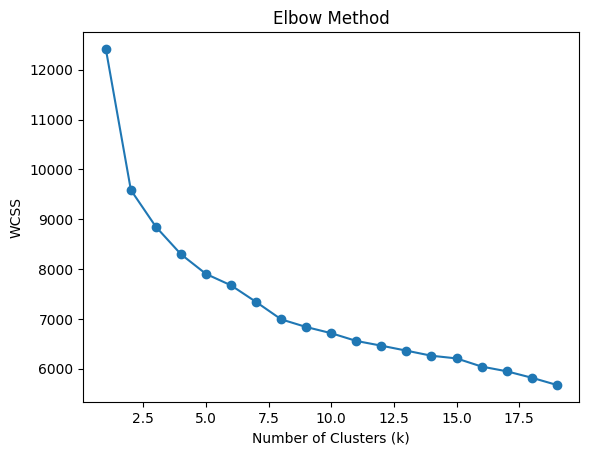

In [ ]:
wcss = []
max_k = 20
for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=1)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, max_k), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [ ]:
np.diff(wcss)

array([-2831.73057109,  -738.76222442,  -550.10788145,  -394.98960913,
        -229.07307168,  -333.24066825,  -348.63770518,  -153.77085915,
        -124.45080934,  -155.29970185,   -94.97561065,   -99.79437271,
        -101.81607236,   -53.62484717,  -163.51928808,   -94.66807234,
        -128.93370697,  -144.96879021])

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_pca)

print('clases únicas:', np.unique(dbscan.labels_))
print('cantidad de puntos core', len(dbscan.core_sample_indices_))
print('puntos de interes', dbscan.core_sample_indices_[:10])

clases únicas: [-1]
cantidad de puntos core 0
puntos de interes []
